t is a type: <class 'numpy.ndarray'>
the function driving_force() creates an: <class 'numpy.ndarray'>
x, u, t are of type : <class 'list'>
T, X, U are of type : <class 'float'>


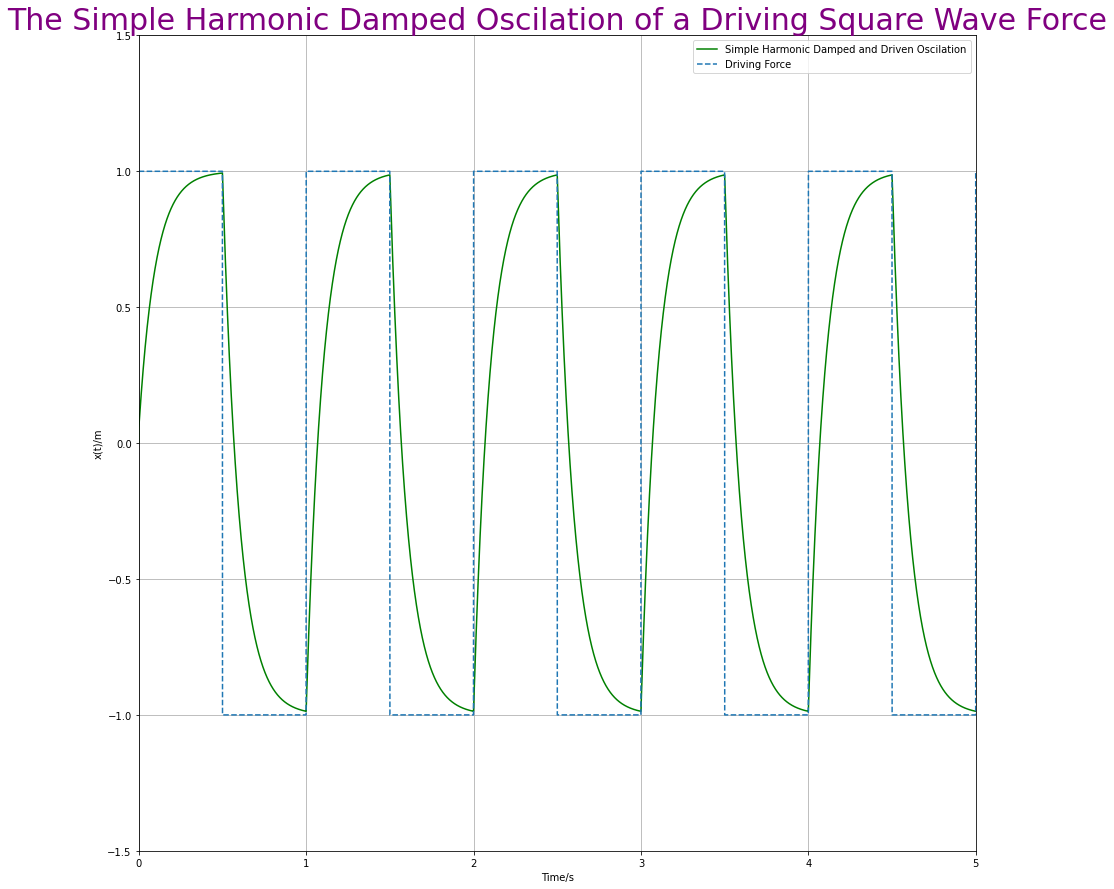

In [ ]:
#Excersize 1 on Excersize 4
#x"(t) = -2*g*x'(t) - w_0^2*x(t) + F(t)/m
#w_0 = (k/m)^1/2
import numpy as np
import scipy 
from scipy import signal


import matplotlib.pyplot as plt
#for this excersize I will be finding the type of every object
#mention if a function or method is called upon
#if method give the type of object it uses
#give the shape of any new array created
#indicate where a tuple of list is being unpacked 
#mention each variables scope(global or local)
#mention the keywords and arguements used in the functions and their types 

def sho_damped_driven_euler(x0, v0, dt, n_steps, omega_0, gamma, mass, force):
  #this function uses five arguements x0, v0, dt, omega_0 being floats or integers and n_steps being an integer
  #it also used three keyword arguements being gamma and mass as floats and force being another function that is called upon inside this function
  x = [x0]#local with a shape of 1 row and 0 columns 
  u = [v0]#local with a shape of 1 row and 0 columns 
  t = [0]#local with a shape of 1 row and 0 columns 
  print("x, u, t are of type :", type(x))#list the same goes for u and t 
  
  for i in range(n_steps):
    T = t[i] + dt
    t.append(T)
  
    X = x[i] + u[i]*dt
    x.append(X)#method append is used here to add the new value X to the list x it is used in a similar way between T and t; and U and u
    
    U = u[i] + dt*(-2*gamma*u[i] - omega_0**2*x[i] + force[i]/mass)#in this line the force function is used and the list it creates is unpacked as i iterates through each value in its list to creat a new float
    u.append(U)
  print("T, X, U are of type :", type(T))#T, X and U are floats and are all local values 
  return  x[:-1]#this now has a shape of 1 row and n_samples columns as a list  

def driving_force(t):
  #this function only uses one arguements being a list or array t
  #and ouputs a list or an array based on t  
  return signal.square(2*np.pi*t)
t = np.linspace(0, 5, 100000)#this is now a global list of the new array t 
print('t is a type:', type(t))
print("the function driving_force() creates an:", type(driving_force(t)))
SHO = sho_damped_driven_euler(0, 1, 0.01, 100000, 1, 10, 1, driving_force(t))
plt.figure(figsize = (15, 15))
plt.plot(t, SHO, 'g', label = "Simple Harmonic Damped and Driven Oscilation")
plt.plot(t, driving_force(t),'--', label = "Driving Force")
plt.title("The Simple Harmonic Damped Oscilation of a Driving Square Wave Force", fontsize = 30, color = 'purple')
plt.xlim(0, 5)
plt.ylim(-1.5, 1.5)
plt.ylabel('x(t)/m')
plt.xlabel('Time/s')
plt.grid()
plt.legend()
plt.show()

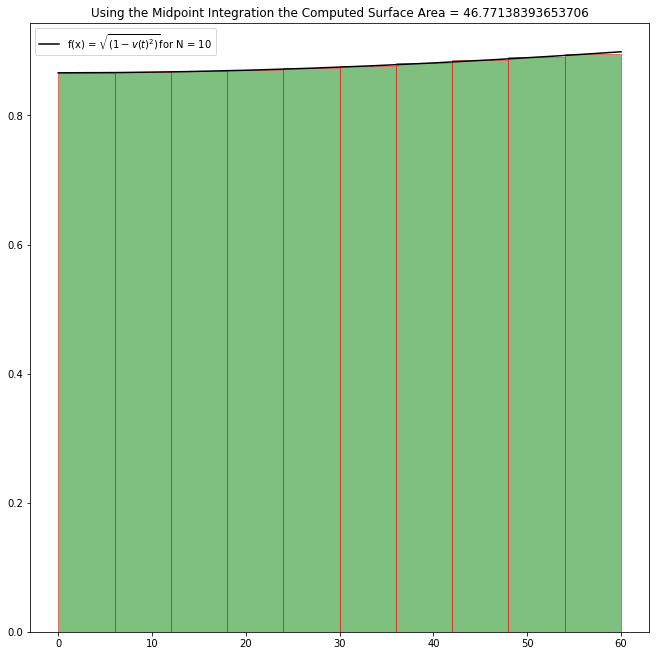

52.67325794039785


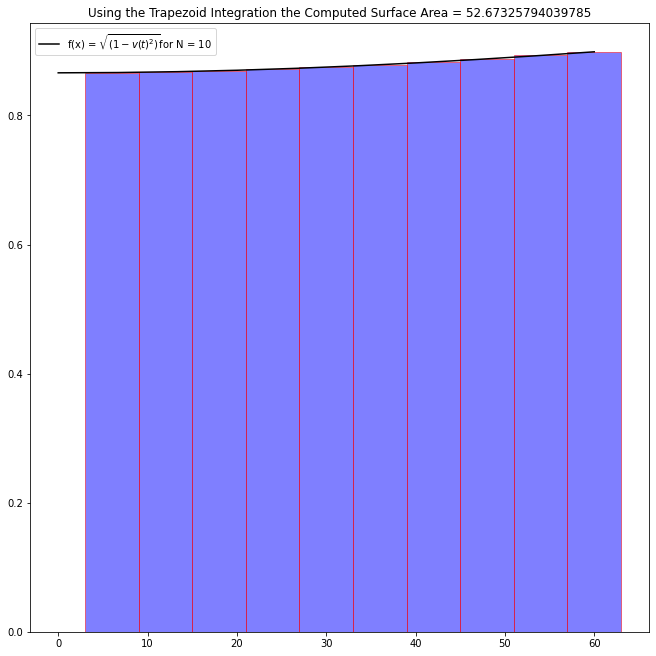

this is scipy integral for N = 10: 52.64018048448477
this is scipy integral for N = 100: 52.64018048448477
this is scipy integral for N = 1000: 52.64018048448477
this is scipy integral for N = 10000: 52.64018048448477


In [ ]:
#Excersize 2
import numpy as np
import scipy 
from scipy import integrate
from tabulate import tabulate
import matplotlib.pyplot as plt

#creating a function to define gamma - use an if and else statement to accept floats and lists or arrays
def Gamma(x):
  if type(x) is list:
    y = [(1-i**2)**0.5 for i in x]#using list comprehension if the type(x) is a list 
    return y
  else:
    return (1-x**2)**0.5#else return an integer using the input float 

#defining the constants
v_0 = 0.5
T = 60
#creating another function for for the midpoint integration method 
def Integrate_midpoint(f, a, b, n_step):#takes four arguements - a function for gamma, lower and upper limit of the integration and then the number of sampling points
  t = np.linspace(a, b, n_step)#making an array for the values of time from the lower to the upper limit and taking n_steps 
  v_t = [v_0*np.cos(i/(2*T)) for i in t]#creating a list from the list of time t using list comprehension and a for loop to iterate through t and using the formula provided to obtain v(t)
  
  Y = f(v_t)#creating the y values by inputing thesev(t) values into the function which we will input as gamma 
  
  t_mid = [(t[j+1]-t[j])/2 for j in range(len(t)-1)]# finding the mid point times with list comprehension using range(len(t)-1) as we iterate from t[0] to t[i+1]
  
  v_t_mid = [v_0*np.cos(i/(2*T)) for i in t_mid]#then using list comprehension and the t_mid values we find the v(t_mid) values 
  
  Y_mid = [(1-v_t_mid[j]**2)**0.5 for j in range(len(v_t_mid))]#creating the y_mid values by inputing these v(t_mid) values into the function which we will input as gamma
   
  dt = (b-a)/n_step#determining dt by finding the difference between the two limits and dividing by the number of steps 
  
  Area = []
  for i in range(len(Y_mid)):#now to find the individual areas at each y_mid value by iterating through y_mid and multiplying it by dt(gives the area of a rectangle)
    Area.append(Y_mid[i]*dt)#add these areas to a new list 
  Area_positive = []                          
  for i in range(len(Area)):#now want all these individual areas at each y_mid value to be positive so use abs() and add these values to a new list            
    Area_positive.append(abs(Area[i]))
  Area_final = sum(Area_positive)#find the total area under the graph by sum() of this positive area values list
  
  tBar = np.linspace(a + 0.5*dt, b - 0.5*dt, n_step)#creating a new list of times from a+0.5*dt to b-0.5*dt as these will be the starting and end points of the bars when plotted  
  vBar = [v_0*np.cos(i/(2*T)) for i in tBar]#use thes values from tBar to determine the v(tBar) so again we can use the gamma function on it to obtain the yBar values 
  yBar = f(vBar)
  plt.figure(figsize = (9, 9), constrained_layout= True)
  plt.title('Midpoint Rule Integration')
  plt.plot(t, Y, color='black', label = r'f(x) = $\sqrt{(1 - v(t)^2)}$' f'for N = {n_step}')#plotting the graph of the function y choosing a color and labelling it 
  plt.bar(tBar, yBar, dt, alpha = 0.5, color= 'g', edgecolor = 'r')#plotting the bars used to determine the area under the graph 
  plt.title(f'Using the Midpoint Integration the Computed Surface Area = {Area_final}')#plotting a titile for the graph and using f string to print the area calculated under the graph
  plt.legend()#using legend to show the labels of the curve
  plt.show()
Integrate_midpoint(Gamma, 0, 60, 10)
#creating another function for for the trapezoid integration method
def Integrate_trapezoid(f, a, b, n_step):#takes four arguements - a function for gamma, lower and upper limit of the integration and then the number of sampling points
  t = np.linspace(a, b, n_step)#making an array for the values of time from the lower to the upper limit and taking n_steps
  v_t = [v_0*np.cos(i/(2*T)) for i in t]#creating a list from the list of time t using list comprehension and a for loop to iterate through t and using the formula provided to obtain v(t)
  
  Y = f(v_t)#creating the y values by inputing thesev(t) values into the function which we will input as gamma
  
  dt = (b-a)/n_step#determining dt by finding the difference between the two limits and dividing by the number of steps
  
  Area = []
  for i in range(len(Y)):#using the same methd as used for the midpoint integration I found the sum of the positive area under the graph 
    Area.append(Y[i]*dt)
  Area_positive = []                          
  for i in range(len(Area)):             
    Area_positive.append(abs(Area[i]))
  Area_final = sum(Area_positive) 
  print(Area_final)
  tBar = np.linspace(a+dt, b, n_step)
  vBar = [v_0*np.cos(i/(2*T)) for i in tBar]
  yBar = f(vBar)
  plt.figure(figsize = (9, 9), constrained_layout= True)
  plt.plot(t, Y, color='black', label = r'f(x) = $\sqrt{(1 - v(t)^2)}$' f'for N = {n_step}')#plotting the graph of the function y choosing a color and labelling it 
  plt.bar(tBar, yBar, dt, alpha = 0.5, color= 'b', edgecolor = 'r')#plotting the bars used to determine the area under the graph 
  plt.title(f'Using the Trapezoid Integration the Computed Surface Area = {Area_final}')#plotting a titile for the graph and using f string to print the area calculated under the graph
  plt.legend()#using legend to show the labels of the curve
  plt.show()
Integrate_trapezoid(Gamma, 0, 60, 10)

#below I was testing the Scipy.integrate.quad() function with sampling values of [10,100,1000,10000] and all areas using this function were the same no matter the number of samples taken
a = 0#defining the uper and lower limits
b = 60
t_10 = np.linspace(a, b, 10)#makie an array of the times 
v_t_10 = [v_0*np.cos(i/(2*T)) for i in t_10]#using list comprehension with this array of t values to determine the v(t) values
y = lambda t_10: (1 - (0.5*np.cos(t_10/(2*T)))**2)**(0.5) #using lambda to find the y values (the curve)
Y_10, err = scipy.integrate.quad(y, 0, 60)#use the scipy.integrate.quad using the lambda function and the lower and upper limits to obtain an area of 52.64
print("this is scipy integral for N = 10:", Y_10)

t_100 = np.linspace(a, b, 100)
v_t_100 = [v_0*np.cos(i/(2*T)) for i in t_100]
y = lambda t_100: (1 - (0.5*np.cos(t_100/(2*T)))**2)**(0.5)
Y_100, err = scipy.integrate.quad(y, 0, 60)
print("this is scipy integral for N = 100:", Y_100)

t_1000 = np.linspace(a, b, 1000)
v_t_1000 = [v_0*np.cos(i/(2*T)) for i in t_1000]
y = lambda t_1000: (1 - (0.5*np.cos(t_1000/(2*T)))**2)**(0.5)
Y_1000, err = scipy.integrate.quad(y, 0, 60)
print("this is scipy integral for N = 1000:", Y_1000)

t_10000 = np.linspace(a, b, 10000)
v_t_10000 = [v_0*np.cos(i/(2*T)) for i in t_10000]
y = lambda t_10000: (1 - (0.5*np.cos(t_10000/(2*T)))**2)**(0.5)
Y_10000, err = scipy.integrate.quad(y, 0, 60)
print("this is scipy integral for N = 10000:", Y_10000)

In [ ]:
#Excersize 2
import numpy as np
import scipy 
from scipy import integrate
from tabulate import tabulate
import matplotlib.pyplot as plt

#this code is the same as the previous cell except I deleted the graph plotting parts so that I could easily obtain the Areas under the graph for each method used
def Gamma(x):
  if type(x) is list:
    y = [(1-i**2)**0.5 for i in x]
    return y
  else:
    return (1-x**2)**0.5


v_0 = 0.5
T = 60
def Integrate_midpoint2(f, a, b, n_step):
  t = np.linspace(a, b, n_step)
  v_t = [v_0*np.cos(i/(2*T)) for i in t]
  
  Y = f(v_t)
  
  t_mid = [(t[j+1]+t[j])/2 for j in range(len(t)-1)]
  
  v_t_mid = [v_0*np.cos(i/(2*T)) for i in t_mid]
  
  Y_mid = [(1-v_t_mid[j]**2)**0.5 for j in range(len(v_t_mid))]# for i in X_mid]
   
  dt = (b-a)/n_step
  
  Area = []
  for i in range(len(Y_mid)):
    Area.append(Y_mid[i]*dt)
  Area_positive = []                          
  for i in range(len(Area)):            
    Area_positive.append(abs(Area[i]))
  Area_final = sum(Area_positive)
  return Area_final 
Integrate_midpoint2(Gamma, 0, 60, 1000)

def Integrate_trapezoid2(f, a, b, n_step):
  t = np.linspace(a, b, n_step)
  v_t = [v_0*np.cos(i/(2*T)) for i in t]
  
  Y = f(v_t)
  
  dt = (b-a)/n_step
  
  Area = []
  for i in range(len(Y)):
    Area.append(Y[i]*dt)
  Area_positive = []                          #same method used to create the area list but no want to turn each element inside every list to +ve value
  for i in range(len(Area)):             #use lambda function which gives absolute value of each value in 'item'
    Area_positive.append(abs(Area[i]))
  Area_final = sum(Area_positive) 
  return Area_final
#the lists and lambda function required for scipy.integrate.quad  
t_10 = np.linspace(a, b, 10)
v_t_10 = [v_0*np.cos(i/(2*T)) for i in t_10]
y = lambda t_10: (1 - (0.5*np.cos(t_10/(2*T)))**2)**(0.5)
Values = [10, 100, 1000]#values to iterate over 
results = [(x, Integrate_midpoint2(Gamma, 0, 60, x), Integrate_trapezoid2(Gamma, 0, 60, x), scipy.integrate.quad(y, 0, 60)) for x in Values]#Using list comprehension to give three different rows using the differentValues = [10,100,1000]
print(tabulate(results, headers=["n_steps", "Midpoint Method", "Trapezoid Method", "Scipy Method"]))#I imported tabulate to do this so i could plot a table with the function as column headers and the Number of sampling sites as the row headers


  n_steps    Midpoint Method    Trapezoid Method  Scipy Method
---------  -----------------  ------------------  ------------------------------------------
       10            47.3745             52.6733  (52.64018048448477, 5.844234039429882e-13)
      100            52.1138             52.6432  (52.64018048448477, 5.844234039429882e-13)
     1000            52.5875             52.6405  (52.64018048448477, 5.844234039429882e-13)


In [ ]:
#Still Excersize 2
x = %timeit Integrate_midpoint2(Gamma, 0, 60, 10000)
print(f'for the Midpoint Integration function')
y = %timeit Integrate_trapezoid2(Gamma, 0, 60, 10000)
print(f'for the Trapezoid Integration function')
z = %timeit Y_10000
print(f'for the Scipy Integration function')
#using %timeit on each function and printing the function each time corresponds to
#one can see the scipy method is the fastest and most accurate followed by the Trapezoid method and finally the Midpoint method is the slowest

10 loops, best of 5: 70.3 ms per loop
for the Midpoint Integration function
10 loops, best of 5: 34.3 ms per loop
for the Trapezoid Integration function
10000000 loops, best of 5: 23.9 ns per loop
for the Scipy Integration function


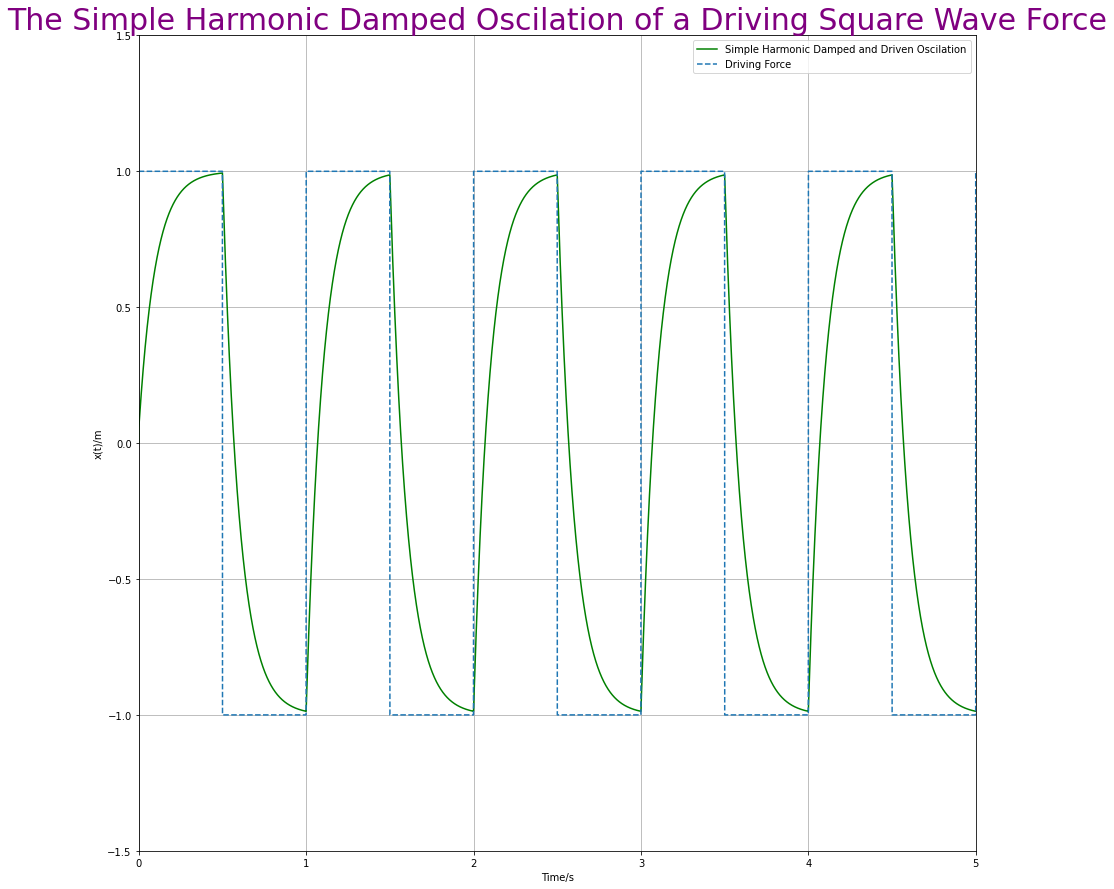

In [ ]:
#Excersize 4
#x"(t) = -2*g*x'(t) - w_0^2*x(t) + F(t)/m
#w_0 = (k/m)^1/2
import numpy as np
import scipy 
from scipy import signal

from tabulate import tabulate
import matplotlib.pyplot as plt

#defining Euler's Forward Method to solve a second order differential equation
def sho_damped_driven_euler(x0, v0, dt, n_steps, omega_0, gamma, mass, force):#lots of arguements were used for this function as we can now change any of them to give different results
  #defining the intitial values of displacement, velocity and time
  #the initial value of time was not given so i assumed it to be zero but this can be changed if necessary
  x = [x0]
  u = [v0]
  t = [0]
  
  
  for i in range(n_steps):#this is where I used Euler's Forward equations 
    T = t[i] + dt#the time increases ncrementally by dt
    t.append(T)
    
    X = x[i] + u[i]*dt#the distance from the origin varies with the velocity 
    x.append(X)
    
    U = u[i] + dt*(-2*gamma*u[i] - omega_0**2*x[i] + force[i]/mass)#the velocity of the object changes with the formula given 
    u.append(U)
  return  x[:-1]#return x[:-1] to remove the last value in this list as it creates an extra value

#defining a driving force for this simple harmonic damped oscillator to be a square cos wave (a cos wave so at t = 0 the amplitude is at 1 )
def driving_force(t):
  return signal.square(2*np.pi*t)
t = np.linspace(0, 5, 100000)#creating a list of sampling values of the time
mass = 1 #even though it stated that mass = 0 then there is no plot so I changed it to 1
omega_0 = 1
x0 = 1
v0 = 1
gamma = 10
dt = 0.01
n_steps = 10000
SHO = sho_damped_driven_euler(0, 1, 0.01, 100000, 1, 10, 1, driving_force(t))#defining a variable SHO to create a list using the driving force function 
plt.figure(figsize = (15, 15))
plt.plot(t, SHO, 'g', label = "Simple Harmonic Damped and Driven Oscilation")#plotting the displacement of the simple harmonic oscillator versus time and labelling it for the legend
plt.plot(t, driving_force(t),'--', label = "Driving Force")#plotting the displacement of the driving force versus time and labelling it for the legend and making it dashed
plt.title("The Simple Harmonic Damped Oscilation of a Driving Square Wave Force", fontsize = 30, color = 'purple')#printing a large title in purple for fun
plt.xlim(0, 5)
plt.ylim(-1.5, 1.5)
plt.ylabel('x(t)/m')
plt.xlabel('Time/s')
plt.grid()
plt.legend()
plt.show()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
No handles with labels found to put in legend.


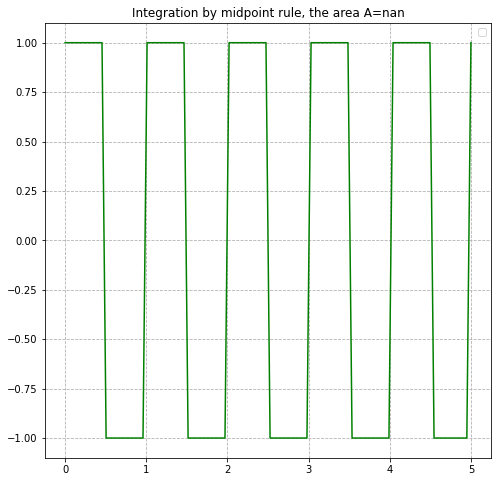

In [ ]:
plt.plot(np.linspace(0,5, 10000), y)
plt.figure(figsize = (15, 15))

import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt

# Did you forget about the lambda function?
def f(x):
  if type(x) is list:
    y = [(1-i**2)**0.5 for i in x]
    return y
  else:
    return (1-x**2)**0.5

# Integration bounds, left and right
a = 0
b = 60
v_0 = 0.5
T = 60

x = np.linspace(0, 5, 100)
X = [v_0*np.cos(i/(2*T)) for i in x]
y = Gamma(X)

# Number of bars
N = 100


plt.figure(figsize=(8,8)) #better details

# What is happening here?
dx = (b-a)/N
xBar = np.linspace(a + 0.5*dx, b - 0.5*dx, N)
yBar = f(xBar)

# Calculating the surface area by adding up A_bars
A = 0 
for yVal in yBar: 
  A +=yVal*dx


plt.title(f"Integration by midpoint rule, the area A={A}")
plt.plot(x, signal.square(2*np.pi*x), color='g') 

plt.grid(linestyle = '--')
plt.legend()
plt.show()